In [1]:
import networkx as nx
import generator as gen
import simulate as sim
import conComp as cc
import random
import numpy as np
import mainMethods as mn


In [39]:

for i in range(50):
    g_init = gen.graph_gen(2,50,0.2,0.02)
    dev = [0.1] + [0.5] + [0.5] * 2
    std_devs = [dev, dev]
    changeVec = [[0.5, 0.5, 0.5], [0.5, 0.5, 0.5]]
    cmat = gen.culture_init(g_init, std_devs, changeVec)
    g, culturemat = sim.simulate_iterstop(g,cmat)
    print(nx.average_shortest_path_length(g))

NetworkXError: Graph is not weakly connected.

In [41]:
gundir = nx.DiGraph.to_undirected(g)
list(nx.algorithms.components.connected_components(gundir))

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24},
 {15},
 {25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49}]

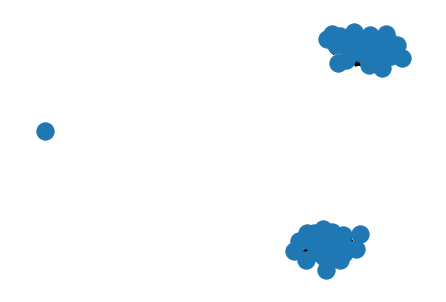

In [38]:
#ccomp = cc.Components(g)
g, cmat, ccomp = sim.sim_one_iter(g,cmat,ccomp,False)
nx.draw(g)

In [42]:
cmat[:, -3:]

array([[0.99      , 0.32482933, 0.10506248],
       [0.01      , 0.59163943, 0.27835828],
       [0.02398624, 0.21698586, 0.01      ],
       [0.72368559, 0.28357497, 0.60084484],
       [0.58649579, 0.39917438, 0.56335944],
       [0.17105703, 0.27794388, 0.35233522],
       [0.14278383, 0.79931588, 0.95223051],
       [0.6737501 , 0.74267569, 0.26927087],
       [0.4655626 , 0.99      , 0.61064426],
       [0.53640254, 0.26208431, 0.8005792 ],
       [0.45811041, 0.51662774, 0.41198266],
       [0.99      , 0.40262459, 0.43622805],
       [0.99      , 0.06357575, 0.96017424],
       [0.96949247, 0.93416309, 0.01      ],
       [0.49640216, 0.27786223, 0.1419397 ],
       [0.35400977, 0.01      , 0.99      ],
       [0.4056965 , 0.99      , 0.85840833],
       [0.87203674, 0.99      , 0.40946961],
       [0.9990518 , 0.42124208, 0.25111244],
       [0.94819456, 0.99      , 0.99      ],
       [0.83525003, 0.52447301, 0.20514414],
       [0.54167084, 0.99      , 0.99      ],
       [0.

In [53]:
fail = 0
for i in range(10 **4):
    g_init = gen.graph_gen(2,50,0.2,0.02)
    if not nx.is_weakly_connected(g_init):
        fail += 1
print(fail)

4
